<a href="https://colab.research.google.com/github/LuisPerdomo123/Inteligencia-Computacional/blob/main/Creaci%C3%B3n_de_componentes_personalizados_de_una_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones de error personalizadas con Tensorflow

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

## Huber loss

La función de pérdida de Huber describe la pena incurrida por un procedimiento de estimación f. Huber (1964) define la función de pérdida de form fragmentada por:

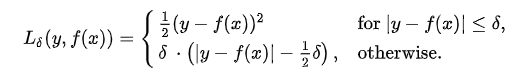

mas información: https://en.wikipedia.org/wiki/Huber_loss

In [3]:
# Función que genera la función de pérdida de Huber
def create_huber(threshold=1.0):
  def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <=threshold
    squared_loss = tf.square(error)/2
    linear_loss = threshold * tf.abs(error) - threshold**2/2
    return tf.where(is_small_error, squared_loss, linear_loss)
  return huber_fn

A continuación, se representa gráficamente la dunicón de pérdida de Huber en función del threshold seleccionado.

In [4]:
# El valor más habitual para la función de pérdida de Huber es 1.0
huber_fn = create_huber(2.0)

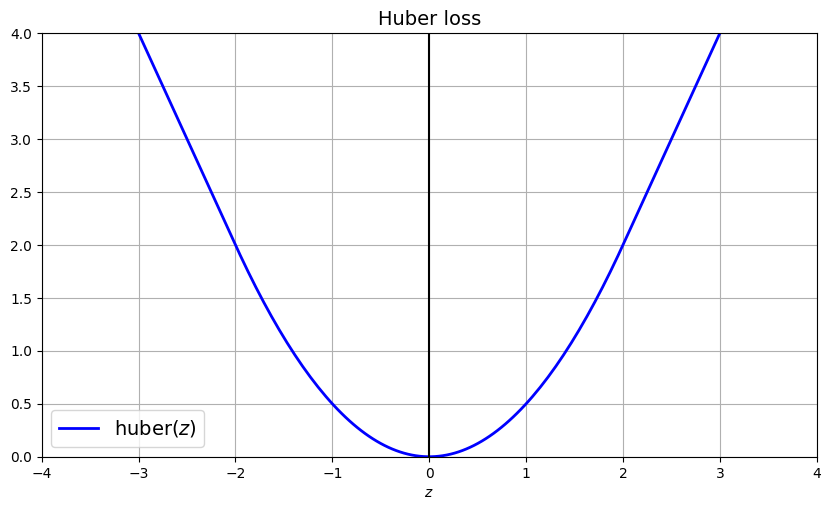

In [5]:
# Representación gráfica de la función de pérdida de Huber
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

## Entrenando una Red neuronal Artificial con la nueva función de error

A continuación se pone en práctica la función de error definida en el apartado anterior en un ejercicio práctico. Para ello, se va a utilizar el caso de uso práctico de predicción del precio de una vivienda presentado en la sección de introducción a Keras.

### importando el conjunto de datos

In [6]:
from tensorflow.keras import datasets

In [7]:
boston_housing = datasets.boston_housing

In [8]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [9]:
import pandas as pd

features = [" CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT",
            "MEDV"]

df_train = pd.DataFrame(np.column_stack([X_train, y_train]), columns=features)
df_train.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


## División del conjunto de datos

In [10]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

## Escalando el conjunto de datos

In [11]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

## Definición de la arquitectura de la Red neuronal Artificial

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [13]:
network = models.Sequential()

network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

In [14]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 741 (2.89 KB)
Trainable params: 741 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Entrenamiento de la Red Neuronal Artificial

### Función de error utilizada en el ejercicio práctico de introducción a Keras

A continuación, se muestra la representación gráfica de la evaluación de los valores resultantes de la función de error **mean_squared_error** durante el proceso de entrenamiento.

In [15]:
network.compile(
    loss = 'mean_squared_error',
    optimizer = 'adam',
    metrics = ['mae']
)

In [16]:
history = network.fit(X_train_prep,
                      y_train,
                      epochs=50,
                      validation_data=(X_val_prep, y_val))

Epoch 1/50
13/13 [==============================] - 3s 84ms/step - loss: 595.0946 - mae: 22.5082 - val_loss: 578.7821 - val_mae: 22.1157
Epoch 2/50
13/13 [==============================] - 0s 25ms/step - loss: 578.0786 - mae: 22.0816 - val_loss: 563.5854 - val_mae: 21.7165
Epoch 3/50
13/13 [==============================] - 0s 20ms/step - loss: 562.7063 - mae: 21.6675 - val_loss: 549.3539 - val_mae: 21.3252
Epoch 4/50
13/13 [==============================] - 0s 19ms/step - loss: 548.0573 - mae: 21.2370 - val_loss: 534.9331 - val_mae: 20.9048
Epoch 5/50
13/13 [==============================] - 0s 20ms/step - loss: 532.1227 - mae: 20.7857 - val_loss: 516.9944 - val_mae: 20.4194
Epoch 6/50
13/13 [==============================] - 0s 16ms/step - loss: 512.5633 - mae: 20.2406 - val_loss: 492.9799 - val_mae: 19.8085
Epoch 7/50
13/13 [==============================] - 0s 18ms/step - loss: 486.6408 - mae: 19.6097 - val_loss: 462.3049 - val_mae: 19.1058
Epoch 8/50
13/13 [=======================

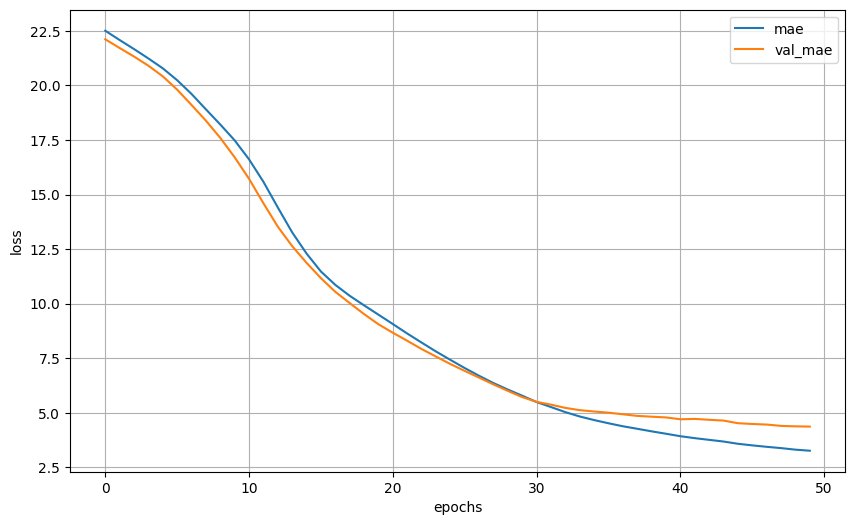

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['mae','val_mae']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Evaluación de los resultados

In [18]:
test_loss, test_mae = network.evaluate(X_test_prep, y_test)

2/2 [==============================] - 0s 43ms/step - loss: 18.1293 - mae: 3.3118


In [19]:
print('tets_mae', test_mae)

tets_mae 3.311800479888916


#### Función de error de Huber

A continuación, se muestrtra la representación gráfica de la evaluación de los valores resultantes de la función de error de **huber** durante el proceso de entrenamiento.

In [21]:
network = models.Sequential()

network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

In [24]:
network.compile(
    loss=create_huber(1.0),
    optimizer='adam',
    metrics=['mae']
)

In [25]:
history = network.fit(X_train_prep,
                      y_train,
                      epochs=50,
                      validation_data=(X_val_prep, y_val))

Epoch 1/50
13/13 [==============================] - 2s 34ms/step - loss: 20.9088 - mae: 21.4088 - val_loss: 20.5080 - val_mae: 21.0080
Epoch 2/50
13/13 [==============================] - 0s 15ms/step - loss: 20.2452 - mae: 20.7452 - val_loss: 19.7709 - val_mae: 20.2709
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 19.4148 - mae: 19.9148 - val_loss: 18.8820 - val_mae: 19.3816
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 18.3816 - mae: 18.8789 - val_loss: 17.9168 - val_mae: 18.4163
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 17.2582 - mae: 17.7563 - val_loss: 16.9539 - val_mae: 17.4539
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 16.1904 - mae: 16.6874 - val_loss: 15.8019 - val_mae: 16.3019
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 15.0440 - mae: 15.5398 - val_loss: 14.6178 - val_mae: 15.1172
Epoch 8/50
13/13 [==============================] - 0s 5ms/s

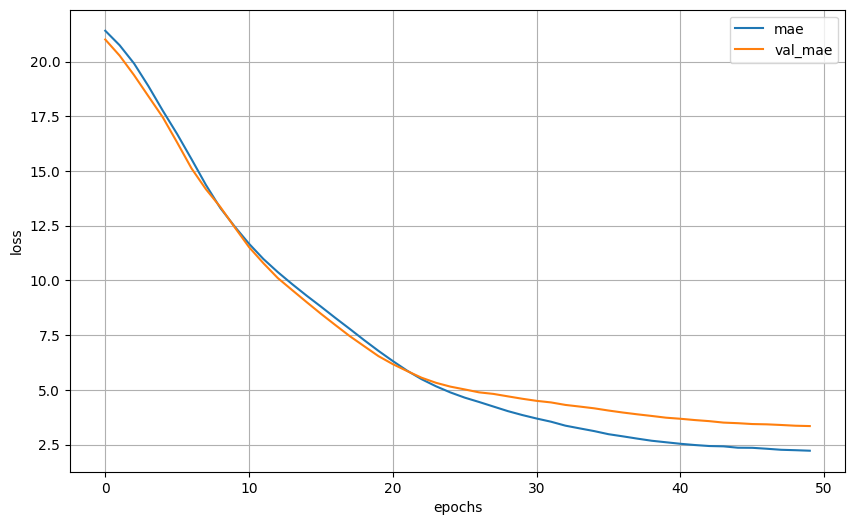

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['mae','val_mae']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [27]:
test_loss, test_mae = network.evaluate(X_test_prep, y_test)

2/2 [==============================] - 0s 12ms/step - loss: 1.8262 - mae: 2.2946


In [28]:
print('test_mae:', test_mae)

test_mae: 2.2946300506591797


## Guardando el modelo en disco con objetos personalizados

Cuando nuestro modelo contiene algún componente personalizado, debemos realizar el siguiente procedimiento para almacenar el modelo en disco e importalo cuando se necesario.

In [29]:
# Guardamos el modelo en disco
network.save("modelo_huber_loss.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
# Importamos el modelo previamente guardado en disco
network2 = tf.keras.models.load_model("modelo_huber_loss.h5",
                                      custom_objects={"huber_fn": create_huber(1.0)})

In [31]:
history = network2.fit(X_train_prep,
                       y_train,
                       epochs=2,
                       validation_data=(X_val_prep, y_val))

Epoch 1/2
13/13 [==============================] - 1s 30ms/step - loss: 1.7685 - mae: 2.2063 - val_loss: 2.8658 - val_mae: 3.3178
Epoch 2/2
13/13 [==============================] - 0s 9ms/step - loss: 1.7621 - mae: 2.2003 - val_loss: 2.8560 - val_mae: 3.3082
